# Machine Learning Techniques on Elliptic Curves 

## Wyatt Smith and Immanuel Schmidt

### Phys. 494 

### 5/5/2021


## Introduction 

We use machine-learning algorithms to predict several invariants of elliptic curves. In particular, two binary classifiers are constructed using a deep neural network architecture to sort ECs by rank and their number of integral points. The resulting networks were found to efficiently predict these two invariants with with varying degrees of success. 

## Background 

An ***elliptic curve*** (EC) is a plane curve arising as a solution to the Weierstrass Equation 
    
$$ y^2+a_1xy+a_3y=x^3+a_2x^2+a_4x+a_6 \ \ \ \ \ (1)$$
    
    
with non-zero discriminant, $\Delta$, where 
    
 $$\Delta = -b_2^2b_8-8b_4^3-27b_6^2+9b_2b_4b_6$$
     
for constants 
     
$$\begin{aligned}
		b_2 &= a_1^2 + 4 a_2\\ 
		b_4 &= 2a_4 + a_1 a_3\\ 
		b_6 &= a_3^2 + 4 a_6 \\
		b_8 &= a_1^2 a_6 + 4 a_2 a_6 - a_1 a_3 a_4 + a_2 a_3^2 - a_4^2.\end{aligned}$$
	
The five coefficients, $a_1,a_2,a_3,a_4,$ and $a_6$, are called the  ***Weierstrass Coefficients*** and they fully characterize an elliptic curve, $E$. 
	
Elliptic Curves are of particular interest for a variety of reasons. For instance, we can define a group structure on the set of rational points of elliptic curve along with an additional point at infinity; we denote this group $E(\mathbb{Q})$. 
	
With this in mind, determining the group structure of $E(\mathbb{Q})$ is something to be desired. It turns out that $E(\mathbb{Q})$ is finitely generated and abelian, meaning it can be decomposed into the direct sum of a free part and a torsion subgroup **[2]**: 
	
$$\begin{equation}  \label{eq:two}
       E(\mathbb{Q}) \simeq \mathbb{Z}^r \oplus \underbrace{\mathbb{Z}_{{p_1}^{n_1}} \oplus \mathbb{Z}_{{p_2}^{n_2}} \oplus \dots \oplus \mathbb{Z}_{{p_s}^{n_s}}}_{E(\mathbb{Q})_{\text{tors}}}\end{equation} \ \ \ \ (2)$$

	
where $r \in \mathbb{N}$ is the ***rank*** of the group, $p_1,p_2, \dots p_s$ are distinct primes, and $E(\mathbb{Q})_{\text{tors}}$ denotes the ***torsion subgroup*** *or* ***torsion part*** of $E(\mathbb{Q})$. The ***torsion order***, $|E(\mathbb{Q})_{\text{tors}}|$ is just the order of this group, and it is equal to $p_1^{n_1}p_2^{n_2}\dots p_s^{n_s}$. 
	
It has been conjectured that half of all elliptic curves have rank one and the other half are of rank zero, in a rigorous sense {\bf [4]}, and that an elliptic curve can have no other rank. 
	
Another invariant of interest for an elliptic curve is the number of ***integral points***, i.e. those with integer coordinates. 
	
The goal of this research was to use machine learning to predict several of these invariants for an elliptic curve. Specifically, we sought to create ML classifiers to predict the rank, torsion order, and number of integral points for an elliptic curve, given its Weierstrass coefficients. Due to time constraints, only the former and latter were pursued to completion. 
	
Previous research conducted by He, Lee, and Oliver found that it was more useful to use the Euler factors of an EC's L-function as training data for ML classifiers on arithmetic curves, rather than simply using its Weierstrass coefficients, **[4]**. An elliptic curve, $E$, has ***Euler factors***, $\epsilon_p$, given by 

$$\begin{equation}  \label{eq:three}
        \epsilon_p = p + 1 - \# \tilde{E}(\mathbb{F}_p)
    \end{equation} \ \ \ \ \ \ \ \ (3)$$
	
where $\tilde{E}(\mathbb{F}_p)$ is the reduction of $E$ modulo $p$ where $p$ is a *good* prime, and $\# \tilde{E}(\mathbb{F}_p)$ denotes the number of points on this curve. A prime is ***good*** if this reduction results in a nonsingular curve. A prime is ***bad*** if it is not good. The ***L-function*** of an elliptic curve, $E$, is given by
	
$$\text{L}(E,s) = \prod_{p \text{ prime}} \big (1 - \frac{\epsilon_p}{p^s} + \frac{1}{p^{2s-1}} \big ) ^{-1}$$ 

and can be simplified to the sum 
	
$$\text{L}(E,s) = \sum_{n = 1} \frac{\epsilon_n}{n^s},$$
	
hence the terminology Euler coefficents. **[1]**. 



<img src="curve.png">

## Methodology 

The goal of this experiment was to create two binary classifiers using machine learning techniques to classify elliptic curves by their rank, as well as their number of integral points. While the rank is conjectured to take on only the values $0$ and $1$, it is known that an elliptic curve can have (finitely) many integer points **[4]**. The scope of this experiment was restricted to discerning between ECs with zero or one integer point for the purpose of simplicity and data acquisition. 
    
A large dataset of elliptic curves and their invariants can be found at the L-Functions and Modular Forms Database (LMFDB) **[3]**. From here, two datasets, $\mathcal{D}_1$, and $\mathcal{D}_2$ are constructed to train each of the binary classifiers.
    
For the first classifier, $30,000$ curves of ranks zero and one and conductors in the range of $1$ to $10,000$ were gathered from the LMFDB to create a dataset of $60,000$ curves in total. Specifically, two lists were downloaded containing the Weierstrass coefficients, $[a_1, a_2,a_3,a_4,a_6]$, for curves of ranks $1$ and $0$. Using `SageMath`, we used eq. $(3)$ *regardless of if a prime was good or bad* to compute the first $100$ Euler factors for each curve in out dataset. `SageMath` has built-in number theory features that allow us to compute these Euler factors efficiently-- in particular, it has a built in function to compute  $\# \tilde{E}(\mathbb{F}_p)$ given a curves Weierstrass coefficients rather effortlessly. Thus, the resulting dataset had the form 
    
$$\mathcal{D}_1 = \{v_1, v_2, \dots v_{60,000} \}$$
    
for

$$v_k = [\epsilon_{p_1}, \epsilon_{p_2}, \epsilon_{p_3}, \dots \epsilon_{p_{100}}, \ell] \in \mathbb{Z}^{101}$$
    
 where  $\epsilon_{p_i}$ is the Euler Factor for the $i$-th prime of the $k$-th elliptic curve computed using $(3)$ (again, regardless of if it is good or bad) and $\ell \in \{0,1\}$ is the label for that curve, giving its rank. 
    
The second dataset, $\mathcal{D}_2$, was computed similarly; however, the availability of data restricted the total number of curves to $20,000$. In particular, $10,000$ curves of with $0$ and $1$ integer points (respectively) were gathered with conductors in the range of $1 - 10,000$. Again the first $100$ Euler factors were computed and each curve was labeled, exactly like in $\mathcal{D}_1$. 

The code we used to produce these datasets in CSV format can be found in `Making_Data_In_Sage.ipynb.`
    
For each dataset, a $80/10/10$ test-train split was performed. That is, a random sample $\mathcal{T}_i \subset \mathcal{D}_i$ was taken for training, consisting $80 \%$ of the total curves,  and the remaining curves $\mathcal{V}_i = \mathcal{D}_i \setminus \mathcal{T}_i$ were further evenly split into a validation set and test set. 


In [199]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
from include import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

In [200]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

The data from `SageMath` (downloaded from the LMFDB website) was downloaded in the .csv format. As we were unable to ignorantly use "np.loadtxt()" as before, we now ignorantly use a library better suited for manipulating these files. Here, we start with observing the specific rank associated with a generated elliptic curve. Once we define the code for learning the rank, we can then generalize this to learning other aspects, such as torsion order, integral points, etc.

In [5]:
import csv

In [202]:
with open('rank_zero.csv', newline='') as f:
    reader = csv.reader(f)
    rank_zero_data = list(reader)
with open('rank_one.csv', newline='') as f2:
    reader2 = csv.reader(f2)
    rank_one_data = list(reader2)
    
print(f'Dimensions of .csv data: {len(rank_one_data)}, {len(rank_one_data[1])}')
print(f'First few elements of the first row: {rank_one_data[0][0:3]}')
print(f'Last element of a random vector in rank_zero: {rank_zero_data[np.random.randint(0, len(rank_zero_data))][-1]}')
print(f'Last element of a random vector in rank_one: {rank_one_data[np.random.randint(0, len(rank_one_data))][-1]}')

Dimensions of .csv data: 30000, 101
First few elements of the first row: ['-2', '-3', '-2']
Last element of a random vector in rank_zero: 0
Last element of a random vector in rank_one: 1


We then constructed various conventional, deep neural networks for our datasets using Keras in TensorFlow. We fixed the architecture to be that of a binary classifier, that is we fixed the input to consist of $100$ neurons, each taking in one of the $100$ Euler factors, and the output to just $0$ or $1$. From here, we modified the architecture and hyper-parameters to find the best model for our data in each case.

The extracted data from the .csv files are now in the form of a list. However, the elements of the list are strings rather than floats or integers. Although there is likely an easier, more straight forward method to this, I naively define a slow function for converting each of the elements within the list into a float. The resulting function takes in the list of strings and returns a numpy array of floats.  

In [7]:
# Takes the data from a list to np array
def form(data):
    sizex = len(data[0])-1 # number of scalars (Euler Factors) within each row vector (excluding final value)
    sizey = len(data)      # number of row vectors 
    
    # Files are arranged by their 'rank'. 'order', etc.
    characteristic = data[0][-1]
    print(f'Dimesions of list: {sizex+1}x{sizey} \n Elements have type: {type(data[0][0])} \n')
    
    # Split data into network input and validation 
    x_input = np.zeros((sizey, sizex))
    y_check = np.zeros((sizey, 1)) 
    
    # For each row I first initialize an empty numpy array of zeros
    for j in range(sizey):
        temp = np.zeros((1, sizex))
        y_check[j] = int(data[j][-1])
        
        # Converting the row of strings into a row of ints
        for i in range(sizex):
            #For elliptic curves (or genus 2 curves), the Euler factors are integers (3.11)
            temp[0][i] = int(data[j][i])
        
        #print(len(gudArr[j]), len(temp[0]))
        # Add the formatted vector to the respective row 
        x_input[j] = temp[0]
        
    
    print(f'Elements have type {type(x_input[0][0])}, with new dimesions ')
    print(f'    x_input: {x_input.shape[0]}x{x_input.shape[1]}') 
    print(f'    y_check: {y_check.shape[0]}x{y_check.shape[1]} \n') 
    
    return x_input, y_check

We can then run this function to convert our data for the rank into the appropriate dimensions, and check whether this is run correctly.

In [8]:
rank0d_x, rank0d_y = form(rank_zero_data)
rank1d_x, rank1d_y = form(rank_one_data)

Dimesions of list: 101x30000 
 Elements have type: <class 'str'> 

Elements have type <class 'numpy.float64'>, with new dimesions 
    x_input: 30000x100
    y_check: 30000x1 

Dimesions of list: 101x30000 
 Elements have type: <class 'str'> 

Elements have type <class 'numpy.float64'>, with new dimesions 
    x_input: 30000x100
    y_check: 30000x1 



However we want to feed this into a network, and have it learn something. This means that, we need to mix up all of the 'ranked' data together, rather than having it split with respect to the actual rank. Here, I define a new function for combining two data sets that may have a different number of vectors (rows), but must have the same dimension (columns).

In [9]:
# Combines the data sets assuming they are of the same dimension (same number of columns)
def combine(data0, data1, verbose=0, extra=0):
    cols = data0.shape[1]
    if (cols != data1.shape[1]):
        raise ValueError('Number of columns must be the same')
        return 0
        
    rows0 = data0.shape[0] 
    rows1 = data1.shape[0]
    
    com = np.zeros((rows0 + rows1, cols))
    
    # append data1 to the end of data0
    com[0:(rows0)] = data0
    com[rows0:(rows0+rows1)] = data1
    
    if verbose:
        print(f'Input shapes: {data0.shape}, {data1.shape} ==> Output shape: {com.shape}')
        #print(f'data0_ij => new_ij, data1_ij => new_(i+{rows0})(j) \n')
        
        # Sanity check
        if extra:
            ran0 = np.random.randint(0, rows0)
            ran1 = np.random.randint(0, rows1)
            ranC = np.random.randint(0, cols)
        
            print(f'data0[{ran0}][{ranC}] = {data0[ran0][ranC]}, combined[{ran0}][{ranC}] = {com[ran0][ranC]}')
            print(f'data1[{ran1}][{ranC}] = {data1[ran1][ranC]}, combined[{ran0+ran1}][{ranC}] = {com[ran0+ran1][ranC]} \n')
    
    return com

With the help of the function defined above and scikitlearn, I then convert the data set into something we can feed into a given network. At the same time, we need to be careful in maintaining the correspondence between the training and validation data so that we can still 'teach' the network.

In [197]:
rank_x = combine(rank0d_x, rank1d_x, verbose=1)
rank_y = combine(rank0d_y, rank1d_y, verbose=1)

#Performing 80/10/10 Train test validate split
x_train, x_test, y_train, y_test = train_test_split(rank_x, rank_y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

num_ranks = 2
y_train_hot = keras.utils.to_categorical(y_train, num_ranks)
y_test_hot = keras.utils.to_categorical(y_test, num_ranks)
y_val_hot = keras.utils.to_categorical(y_val, num_ranks)

def mix(datax, datay, numChar=2):
    #Performing 80/10/10 Train test validate split
    x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

    y_train_hot = keras.utils.to_categorical(y_train, numChar)
    y_test_hot = keras.utils.to_categorical(y_test, numChar)
    y_val_hot = keras.utils.to_categorical(y_val, numChar)
    
    a = [x_train, x_val, x_test]
    b = [y_train_hot, y_val_hot, y_test_hot]
    
    return a, b

Input shapes: (30000, 100), (30000, 100) ==> Output shape: (60000, 100)
Input shapes: (30000, 1), (30000, 1) ==> Output shape: (60000, 1)


Given this data set, we are still unsure about whether a given network can actually learn anything. For this reason, we need to implement networks with different hyperparameters, in order to find a configuration that will work best. For this reason, I start by writing functions that will help generate a supervised network given parameters such as architecutre, a list of activations, optimizers, etc. Directly below, I create a function that given a list of acitvations `specActs`, and a list of layers `specInd` corresponding to the layer to implement the given activation, will return a dictionary we can then refer to when building a network. 

In [162]:
# Inputs must be of same dimension
# Input activations ['relu', 'sigmoid', etc.] -> specActs
# Array of indices at which you want this activation [[1,3], [2,4], etc.]
def makeActs(specActs, specInd):
    # Initializing a dictionary 
    acts = {
    'initial' : 'relu',
    'final' : 'softmax',
    'all' : 'relu',
    'indices' : [],
    'functions' : []
    }
    
    temp = []
    key = {}
    for i in range(len(specInd)):
        for j in range( len(specInd[i]) ):
            temp.append(specInd[i][j])
            key[specInd[i][j]] = specActs[i]
    
    temp.sort()
    
    acts['indices'] = temp
    acts['functions'] = ['None']*len(temp)
    #print(f'Temp: {temp}') 
    
    count = 0
    for i in acts['indices']:
        #print(i)
        acts['functions'][count] = key[i]
        #print(f'Key[i]: {key[i]}')
        count += 1
    
    return acts

For clarity, I define a function below that takes the raw data and hyperparameters (network architecture `arch`, dictionary of specified activations `acts`, optimizers `opt`, epochs `epochLimit`, etc.), generates a deep neural network, and returns the accuracy of the model on the testing data set.  

In [185]:
# arch is an array of internal network architectures
#x = [xtrain, xval, xtest]
#y = [ytrain, yval, ytest]

def estDNN(x,y, arch, acts, opt, cost='categorical_crossentropy', epochLimit=5, numout=2, mod=0, verb=0):

    #print(acts)
    model = keras.Sequential(
        [
            layers.Dense(arch[0],input_shape=x[0][0].shape, activation=acts['initial'])
        ])
    #model.add(tf.keras.Input(shape=xtrain[0].shape, activation=acts['initial'])
    count = 0
    check = len(acts['indices'])
    for i in range(len(arch)-1):
        #print(f"acts[indices] in estDNN: {acts['indices']}")
        if count >= check:
            count = check - 1
        #print(f"acts[indices][count ={count}] in estDNN: {acts['indices'][count]}")

        if i == acts['indices'][count]:
            temAct = acts['functions'][count]
                
            count += 1
        else:
            temAct = acts['all']
        
        #print(temAct, "type =", type(temAct))
        
        model.add(layers.Dense(arch[i+1], activation=temAct))

    model.add(tf.keras.layers.Dense(numout, activation=acts['final']))
    model.compile(loss=cost, optimizer=opt, metrics=['accuracy'])

    if verb:
        model.summary()

    training_history = {}
    training_history['test'] = model.fit(x[0],y[0], epochs=epochLimit,validation_data=(x[1],y[1]), verbose=verb)

    results = {
    'n' : arch,
    'loss' : training_history['test'].history['loss'][-1],
    'accuracy' : training_history['test'].history['accuracy'][-1],
    'val_loss': training_history['test'].history['val_loss'][-1],
    'val_accuracy': training_history['test'].history['val_accuracy'][-1],
    #'activations' : acts,
    'optimizer' : opt
    }

    # Testing the given model on the 'test' data set
    testPred = model(x[2])
    predictions = np.argmax(testPred,axis=1)
    mistakes = np.where(predictions != y[2])[0]
    num_mistakes = len(mistakes)
    testAccuracy = 1 - (100*num_mistakes)/(x[2].shape[0])
    ValAccuracy = results['val_accuracy']
    if verb:
        print('\n Parameters:')
        for result in results:
            print(f'{result} = {results[result]}')
        print('\n Activations')
        for param in acts:
            print(f'     {param}: {acts[param]}')
        print(f'\n Accuracy on test: {testAccuracy} \n')
        print(f'\n Accuracy on val: {ValAccuracy} \n')
        
    if mod:
        return model, training_history
    else:
        return results['val_accuracy']


## Results

Using this automated procdure, let's test this to see if we can quickly generate a DNN!

In [164]:
a = [x_train, x_val, x_test]
b = [y_train_hot, y_val_hot, y_test_hot]

actives = ['softmax', 'selu']
atInds = [[1, 3], [0]]

n = [10, 20, 30, 40, 50]
optim = 'adam'

g = makeActs(actives, atInds)

res = estDNN(a, b, n, g, optim, verb=1)

{'initial': 'relu', 'final': 'softmax', 'all': 'relu', 'indices': [0, 1, 3], 'functions': ['selu', 'softmax', 'softmax']}
selu type = <class 'str'>
softmax type = <class 'str'>
relu type = <class 'str'>
softmax type = <class 'str'>
Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1579 (Dense)           (None, 10)                1010      
_________________________________________________________________
dense_1580 (Dense)           (None, 20)                220       
_________________________________________________________________
dense_1581 (Dense)           (None, 30)                630       
_________________________________________________________________
dense_1582 (Dense)           (None, 40)                1240      
_________________________________________________________________
dense_1583 (Dense)           (None, 50)                2050      
__________________

/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Now that we are able to quickly construct a network with specified parameters, we now want to, at least, search for hyperparameters that have characteristics of training a good model. I then start this by creating a function that will generate a dictionary of random parameters, we can then feed into a network

In [174]:
def genParams(ver=0):
    # list of accuracies
    acc = []

    # possible params
    possActs = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential']
    possOpts = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam', 'Ftrl']

    # Define limits
    searchNum = 10
    archWid = 21
    archLen = a[0][0].shape[0]
    numActs = 10

    # Random hyperparameters
    sizes = []
    actives = []
    atInds = []
    n = []
    sumSizes = 0
    numOfInds = 0

    opt = possOpts[np.random.randint(0, len(possOpts) ) ]

    while (len(n) <= 2):
        foo = np.zeros( (1, np.random.randint(1, archWid)) )
        foo = foo[0]
        foo = np.random.randint(1, archLen, size=len(foo))
        #foo = np.append(foo, foo[1])

        foo2 = np.unique( foo, return_index=True)
        #print(f'foo = {foo}')

        if len(foo2) == 2:
            uniqueInds = foo2[1]
            #print(f'uniqueInds: {uniqueInds}')

        count = 0
        for elm in foo:
            if elm not in uniqueInds:
                dummy = np.delete(foo, count)
            count += 1
        n = dummy
        #print(f'len foo2= {len(foo2)}')
        #print(f'n after = {n}')

    ran = np.random.randint(2,len(n))
    #print(f'ran = {ran}')

    while (numOfInds <= 1):
        n_indices, dummy = np.unique(np.random.randint(1,len(n)+1, size=ran), return_index=True)
        numOfInds = len(n_indices)
        #print(f' n_indices = {n_indices}, numOfInds = {numOfInds}')


    #print(f'\n n_indices = {n_indices}')
    #print(f'n = {n}')

    while (sumSizes != numOfInds):
        sizes.append( np.random.randint(1, numOfInds) )
        sumSizes = np.sum(sizes)

        while (sumSizes > numOfInds):
            sizes[-1] = sizes[-1] -1
            sumSizes = np.sum(sizes)

    #print(f'sizes = {sizes}')
    l = 0
    k = len(sizes)
    for i in range(k):
        temp = np.zeros( (1, sizes[i]) )
        temp = n_indices[l:(l + sizes[i])]
        #if i == (k-1):
        #    temp = n_indices[l::]
        #print(f'i = {i}, l={l}, temp = n_indices[l:(sizes[i])] = {temp}, sizes[i] = {sizes[i]}')
        atInds.append( temp )
        l += sizes[i]

    for inds in range( len(atInds) ):
        actives.append( possActs[ np.random.randint(0,len(possActs)) ] )

    if ver:
        print(f'atInds: {atInds}')
        print(f'actives: {actives}')
        print(f'opt: {opt}')
    
    rest = possOpts[np.random.randint(0, len(possOpts) ) ]
    if type(rest) != str:
        rest = str(rest)
        
    g = makeActs(actives, atInds)
    g['all'] = rest
    g['n'] = n
    g['opt'] = opt
    g['actives'] = actives
    g['atInds'] = atInds
    return g

Along with this newly defined function, I finally write a main function that uses the two previous functions to use generate random sets of parameters, and find a deep neural network that works best. The function takes in the formatted data, and returns the parameters and accuracies for a generated model.

In [187]:
def findNet(datax, datay, net, numChar=2, ver=0, numNets=5):
    acc = []
    allParams = []

    for someNet in range(numNets):
        print(f'Computing network {someNet}...')
        pars = genParams()
        
        actives = pars['actives']
        atInds = pars['atInds']
        g = makeActs(actives, atInds)
        
        allParams.append(pars)
        n = pars['n']
        specOp = pars['opt']
        
        a,b = mix(datax, datay)
        
        
        #print(a[0].shape, a[1].shape, a[2].shape)
        #print(b[0].shape, b[1].shape, b[2].shape)
        #print(f'pars infindNet {pars}')
        #print(f'n = {n}')
        
        tempAcc = net(a, b, n, g, specOp)
        
        pars['val_acc'] = tempAcc
        acc.append(tempAcc)
        
        print(f'\n Completed network {someNet} with accuracy {tempAcc}')
        
        if ver:
            for param in pars:
                if param == 'initial' or param == 'final':
                    continue
                print(f'{param}: {pars[param]}')
        
        
        if ( (someNet != 0) and (acc[someNet] > acc[someNet-1]) ):
            acc[someNet], acc[someNet-1] =  acc[someNet-1], acc[someNet]
            allParams[someNet], allParams[someNet-1] = allParams[someNet-1], allParams[someNet]
        
    print(f' \n Finished with accuracies: {acc}')
    return allParams

We then construct various conventional, deep neural networks for our datasets using Keras in TensorFlow.

In [188]:
# Finally test!
goodParams = findNet(rank_x, rank_y, estDNN, ver=1)

Computing network 0...


/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.



 Completed network 0 with accuracy 0.9801666736602783
all: SGD
indices: [9, 10, 12, 13]
functions: ['sigmoid', 'sigmoid', 'sigmoid', 'relu']
n: [80 86  2 10 53 51  3 19 46 63 24 11 77 43]
opt: Nadam
actives: ['sigmoid', 'sigmoid', 'relu']
atInds: [array([ 9, 10]), array([12]), array([13])]
val_acc: 0.9801666736602783
Computing network 1...

 Completed network 1 with accuracy 0.5019999742507935
all: Adam
indices: [2, 4, 5, 7]
functions: ['elu', 'exponential', 'exponential', 'relu']
n: [83 98 25 79 23 14 85]
opt: RMSprop
actives: ['elu', 'exponential', 'relu']
atInds: [array([2]), array([4, 5]), array([7])]
val_acc: 0.5019999742507935
Computing network 2...

 Completed network 2 with accuracy 0.4970000088214874
all: Ftrl
indices: [4, 6, 9, 10]
functions: ['softsign', 'relu', 'relu', 'relu']
n: [39  2 67 13 50 26 33 75 78 63 60 54 67]
opt: Ftrl
actives: ['softsign', 'relu']
atInds: [array([4]), array([ 6,  9, 10])]
val_acc: 0.4970000088214874
Computing network 3...

 Completed network 3 

Indeed, we are able to generate a set of sub-par networks, but is there any meaning to this? To see what works best, I sort the networks with respect to the accuracy of each from least to greatest.  

In [189]:
def sortAcc(e):
    return e['val_acc']

goodParams.sort(key=sortAcc) 
goodParams

[{'initial': 'relu',
  'final': 'softmax',
  'all': 'Ftrl',
  'indices': [4, 6, 9, 10],
  'functions': ['softsign', 'relu', 'relu', 'relu'],
  'n': array([39,  2, 67, 13, 50, 26, 33, 75, 78, 63, 60, 54, 67]),
  'opt': 'Ftrl',
  'actives': ['softsign', 'relu'],
  'atInds': [array([4]), array([ 6,  9, 10])],
  'val_acc': 0.4970000088214874},
 {'initial': 'relu',
  'final': 'softmax',
  'all': 'Adam',
  'indices': [2, 4, 5, 7],
  'functions': ['elu', 'exponential', 'exponential', 'relu'],
  'n': array([83, 98, 25, 79, 23, 14, 85]),
  'opt': 'RMSprop',
  'actives': ['elu', 'exponential', 'relu'],
  'atInds': [array([2]), array([4, 5]), array([7])],
  'val_acc': 0.5019999742507935},
 {'initial': 'relu',
  'final': 'softmax',
  'all': 'Adamax',
  'indices': [1, 2],
  'functions': ['softsign', 'sigmoid'],
  'n': array([99,  4,  1]),
  'opt': 'Adadelta',
  'actives': ['softsign', 'sigmoid'],
  'atInds': [array([1]), array([2])],
  'val_acc': 0.5149999856948853},
 {'initial': 'relu',
  'final':

Using the sorted list above, we want to see which similarities that arise in the beginning and end of the list. The output suggests that the network favors deeper networks and sigmoid/soft activation functions. keeping this in mind, I generate a new model that caters to these parameters.   

In [190]:
a, b = mix(rank_x, rank_y)

actives = ['sigmoid', 'softmax']
atInds = [[1, 3,5, 7], [2,8]]

n = [70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
optim = 'adam'
epochs = 30

g = makeActs(actives, atInds)
g['all'] = 'relu'

rankModel, hist = estDNN(a, b, n, g, optim, mod=1, epochLimit=epochs, verb=1)

Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1902 (Dense)           (None, 70)                7070      
_________________________________________________________________
dense_1903 (Dense)           (None, 70)                4970      
_________________________________________________________________
dense_1904 (Dense)           (None, 70)                4970      
_________________________________________________________________
dense_1905 (Dense)           (None, 70)                4970      
_________________________________________________________________
dense_1906 (Dense)           (None, 70)                4970      
_________________________________________________________________
dense_1907 (Dense)           (None, 70)                4970      
_________________________________________________________________
dense_1908 (Dense)           (None, 70)             

/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Now that we created a model better than anything generated previously, let's see how this performs on the test sets!

In [193]:
#plotting
# score = model.evaluate(xdata, ydata, verbose=0);
def acPlots(xdata, ydata, mod, evlabel, training_history):
    fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

    score = mod.evaluate(xdata, ydata, verbose=0);
    #print(score)
# accuracy
    ax[0].plot(training_history['test'].history['accuracy'], color=colors[0])
    ax[0].plot(training_history['test'].history['val_accuracy'], ls='--', color=colors[-3])
    ax[0].set_ylabel('model accuracy')
    ax[0].legend(['train', evlabel], loc='best')
    ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
    ax[0].set_ylim(top=1)

# cost 
    ax[1].plot(training_history['test'].history['loss'], color=colors[0])
    ax[1].plot(training_history['test'].history['val_loss'], ls='--', color=colors[-3])
    ax[1].set_ylabel('model cost')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylim(bottom=0)
    ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
    ax[1].legend(['train', evlabel], loc='best');
    
    if evlabel == 'test':
        print('Final accuracy: ', training_history['test'].history['val_accuracy'][-1])

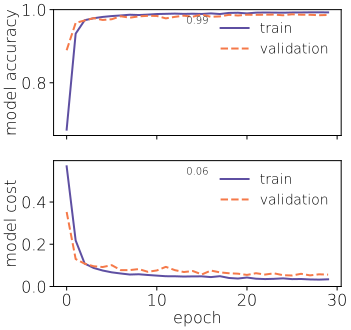

In [194]:
#hist['test'].history['accuracy']
elab = 'validation'
acPlots(a[1], b[1], rankModel, elab, hist)

#allX = rankModel.evaluate(rank_x)
#type(allX)
#plt.plot(allX, rank_y)

Now that we have finished generating networks to guess the rank of a given elliptic curve, we use the same method for generating a network to predict the number of integral points of a curve.

In [201]:
with open('integral_zero.csv', newline='') as f:
    reader = csv.reader(f)
    integral_zero_data = list(reader)
with open('integral_one.csv', newline='') as f2:
    reader2 = csv.reader(f2)
    integral_one_data = list(reader2)

print(f'Dimensions of .csv data: {len(integral_zero_data)}, {len(integral_one_data[1])}')
print(f'First few elements of the first row: {integral_one_data[0][0:3]}')
print(f'Last element of a random vector in int_zero: {integral_zero_data[np.random.randint(0, len(integral_zero_data))][-1]}')
print(f'Last element of a random vector in int_one: {integral_one_data[np.random.randint(0, len(integral_zero_data))][-1]}')

int0d_x, int0d_y = form(integral_zero_data)
int1d_x, int1d_y = form(integral_one_data)

int_x = combine(int0d_x, int1d_x)
int_y = combine(int0d_y, int1d_y)

#intParams = findNet(int_x, int_y, estDNN)

Dimensions of .csv data: 10000, 101
First few elements of the first row: ['-2', '-1', '1']
Last element of a random vector in int_zero: 0
Last element of a random vector in int_one: 1
Dimesions of list: 101x10000 
 Elements have type: <class 'str'> 

Elements have type <class 'numpy.float64'>, with new dimesions 
    x_input: 10000x100
    y_check: 10000x1 

Dimesions of list: 101x10000 
 Elements have type: <class 'str'> 

Elements have type <class 'numpy.float64'>, with new dimesions 
    x_input: 10000x100
    y_check: 10000x1 



In [196]:
intParams = findNet(int_x, int_y, estDNN, numNets=30)
intParams.sort(key=sortAcc)

Computing network 0...


/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.



 Completed network 0 with accuracy 0.4894999861717224
Computing network 1...

 Completed network 1 with accuracy 0.5260000228881836
Computing network 2...

 Completed network 2 with accuracy 0.5074999928474426
Computing network 3...

 Completed network 3 with accuracy 0.4580000042915344
Computing network 4...

 Completed network 4 with accuracy 0.5130000114440918
Computing network 5...

 Completed network 5 with accuracy 0.4729999899864197
Computing network 6...

 Completed network 6 with accuracy 0.5040000081062317
Computing network 7...

 Completed network 7 with accuracy 0.515999972820282
Computing network 8...

 Completed network 8 with accuracy 0.5299999713897705
Computing network 9...

 Completed network 9 with accuracy 0.49149999022483826
Computing network 10...

 Completed network 10 with accuracy 0.5065000057220459
Computing network 11...

 Completed network 11 with accuracy 0.5040000081062317
Computing network 12...

 Completed network 12 with accuracy 0.5195000171661377
Com

In [198]:
intParams

[{'initial': 'relu',
  'final': 'softmax',
  'all': 'Adagrad',
  'indices': [1, 3],
  'functions': ['tanh', 'softplus'],
  'n': array([95, 46, 49, 81]),
  'opt': 'Adagrad',
  'actives': ['tanh', 'softplus'],
  'atInds': [array([1]), array([3])],
  'val_acc': 0.4580000042915344},
 {'initial': 'relu',
  'final': 'softmax',
  'all': 'Adamax',
  'indices': [1, 4, 6, 8],
  'functions': ['selu', 'selu', 'tanh', 'exponential'],
  'n': array([75, 47, 25, 99, 55, 59, 17, 34]),
  'opt': 'SGD',
  'actives': ['selu', 'tanh', 'exponential'],
  'atInds': [array([1, 4]), array([6]), array([8])],
  'val_acc': 0.4729999899864197},
 {'initial': 'relu',
  'final': 'softmax',
  'all': 'Adadelta',
  'indices': [1, 5, 7, 8, 11, 13, 14, 15],
  'functions': ['sigmoid',
   'tanh',
   'tanh',
   'tanh',
   'tanh',
   'softplus',
   'softplus',
   'softplus'],
  'n': array([ 2, 80, 73, 86, 96,  8, 86, 59, 42, 16, 15, 27, 68,  8,  5, 46]),
  'opt': 'Adagrad',
  'actives': ['sigmoid', 'tanh', 'softplus'],
  'atInd

For some reason, the generated networks do not seem to be learning anything about the integral points. Therefore, we attempt to generate a working network for the integral points by hand. 

Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2248 (Dense)           (None, 200)               20200     
_________________________________________________________________
dense_2249 (Dense)           (None, 200)               40200     
_________________________________________________________________
dense_2250 (Dense)           (None, 200)               40200     
_________________________________________________________________
dense_2251 (Dense)           (None, 100)               20100     
_________________________________________________________________
dense_2252 (Dense)           (None, 2)                 202       
Total params: 120,902
Trainable params: 120,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
500/500 [==============================] - 2s 3ms/step - loss: 0.7113 - accuracy: 0.5050 - val_loss: 

/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


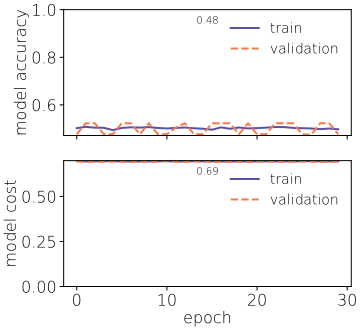

In [203]:
a, b = mix(int_x, int_y)

actives = ['sigmoid', 'softmax']
atInds = [[0, 2], [1,3]]

n = [200, 200, 200, 100]
optim = 'adam'
epochs = 30

g = makeActs(actives, atInds)
g['all'] = 'relu'

rankModel, hist = estDNN(a, b, n, g, optim, mod=1, epochLimit=epochs, verb=1)

elab = 'validation'
acPlots(a[1], b[1], rankModel, elab, hist)

## Discussion

The results of this experiment were mixed. The first model was able to discern between rank $0$ and rank $1$ curves with an accuracy of over $98\%$, which is comparable to the results found by He et. al., which were as high as $.998$ **[4]**.  Moreover, it was found that fatter, deeper networks using predominantly `relu` activation functions were favored by this data.  Despite the relative simplicity of these networks, we were able to achieve near perfect accuracy on our validation data.

 

We were unable to get the second model to train on the integer points data; however. We were only able to achieve accuracies comparable to the flip of a coin, whereas He. et. al. were able to train a network in a similar configuration with near perfect accuracy **[4]**. This suggests that there might have been some error in the generation of our second dataset, $\mathcal{D}_2$, as our model is practically labeling curves at random.

 

If given more time, we would continue to resolve this issue concerning the integer points model, and move on to create new models for predicting other invariants such as the torsion order of a curve, and broadening the integer points classifier to a wider range (e.g. a ternary classifier). The literature suggests it is possible to obtain high accuracies in such models **[4]**.

 

Despite these limitations, we are overall quite satisfied with our research as-is, as we managed to replicate some of the results from He et. al.'s published paper with a comparably high accuracy.

## References


**[1].** J. H. Silverman and  J. T. Tate, *Rational Points on Elliptic Curves*, second edition, Undergraduate Texts in Mathematics, 2015. 
    
**[2].** K. Ireland and M. Rosen, *A Classical Introduction to Modern Number Theory*, second edition, Graduate Texts in Mathematics **84**, Springer, 1998. 
    
**[3].** The LMFDB Collaboration, *The L-functions and Modular Forms Database*, https://www.lmfdb.org, 2020 [Online, accessed April 7, 2021]. 
    
**[4].** Y.-H. He, K.-H. Lee, and T. Oliver, *Machine-Learning Arithmetic Curves*, arXiv:2012.04084. 